## Load Movie Duration Data into a Dictionary
Movie durations from 2011 to 2020 were calculated using Excel.

In [18]:
import pandas as pd

years = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
durations = [103, 101, 99, 100, 100, 95, 95, 96, 93, 90, 80]

# Create dictionary with years and durations
movie_dict = {'years': years, 'durations': durations}

movie_dict

{'years': [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021],
 'durations': [103, 101, 99, 100, 100, 95, 95, 96, 93, 90, 80]}

## Create a Dataframe Using the Movie Duration Dictionary

In [19]:
# Create movie duration dataframe
durations_df = pd.DataFrame(movie_dict)

durations_df

,years,durations
0,2011,103
1,2012,101
2,2013,99
3,2014,100
4,2015,100
5,2016,95
6,2017,95
7,2018,96
8,2019,93
9,2020,90


## Inspect Data Visual

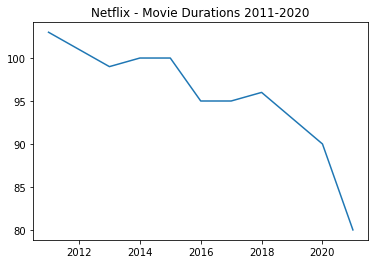

In [20]:
import matplotlib.pyplot as plt

# Create movie released years vs duratino figure
fig = plt.figure()

plt.plot(durations_df['years'], durations_df['durations'])

plt.title("Netflix - Movie Durations 2011-2020")

plt.show()

## Load Complete Netflix data
It appears that movie lengths have decreased over the past decade based on the Netflix data. Below will use the original Netflix CSV to answer these two questions:
1. What odes the trand look like over a long period of time?
2. Does the genre of movie affect the duration?

In [21]:
# Create netflix data datafrome
netflix_df = pd.read_csv(r"C:\Users\jamie\OneDrive\Documents\datasets\netflix_titles.csv")

netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas


## Filter for Movies 
Create a dataframe with only Netflix movies.

In [22]:
# Subset the netlifx dataframe
movies_only_df =  netflix_df[netflix_df['type'] == 'Movie']

netflix_movies_df = movies_only_df[['title', 'country', 'genre', 'release_year', 'duration']]

netflix_movies_df.head()

,title,country,genre,release_year,duration
1,7:19,Mexico,Dramas,2016,93
2,23:59,Singapore,Horror Movies,2011,78
3,9,United States,Action,2009,80
4,21,United States,Dramas,2008,123
6,122,Egypt,Horror Movies,2019,95


## Create Movie Duration by Year Scatter Plot 

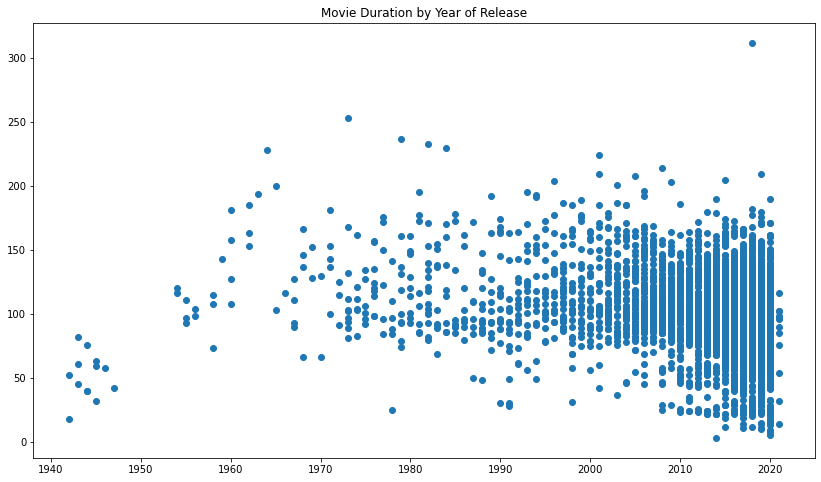

In [28]:
fig = plt.figure(figsize = (14, 8))

# Create scatter plot
plt.scatter(netflix_movies_df['release_year'], netflix_movies_df['duration'])

plt.title('Movie Duration by Year of Release')

plt.show()

## Investigate Movies under 60 Minutes

The figure above shows that newer movies are overrepresented on the platform. In addition, some of the films are under an hour long. Looking at these films could provide some insight into what's lowering the average duration.

In [32]:
short_movies = netflix_movies_df[netflix_movies_df['duration'] < 60]

short_movies[0:30]

,title,country,genre,release_year,duration
35,#Rucker50,United States,Documentaries,2016,56
55,100 Things to do Before High School,United States,Uncategorized,2014,44
67,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,Uncategorized,2017,37
101,3 Seconds Divorce,Canada,Documentaries,2018,53
146,A 3 Minute Hug,Mexico,Documentaries,2019,28
162,A Christmas Special: Miraculous: Tales of Lady...,France,Uncategorized,2016,22
171,A Family Reunion Christmas,United States,Uncategorized,2019,29
177,A Go! Go! Cory Carson Christmas,United States,Children,2020,22
178,A Go! Go! Cory Carson Halloween,NaN,Children,2020,22
179,A Go! Go! Cory Carson Summer Camp,NaN,Children,2020,21


## Marking Non-Feature Movies
It appears that many of the movies under 60 minutes are in the children, stand-up, and documentary genre. I'll use different colors to mark these 3 genres in the graph below.

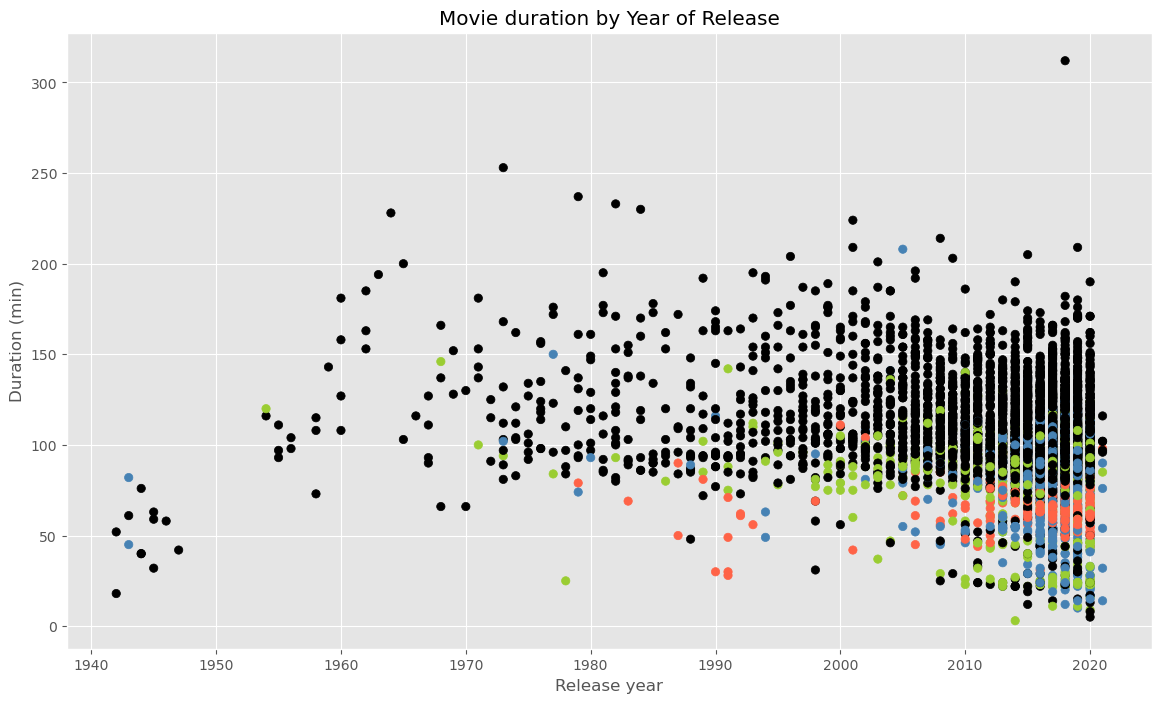

In [57]:
colors = []

for lab, row in netflix_movies_df.iterrows():
    if row['genre'] == 'Children':
        colors.append('yellowgreen')
    elif row['genre'] == 'Stand-Up':
        colors.append('tomato')
    elif row['genre'] == 'Documentaries':
        colors.append('steelblue')
    else: 
        colors.append('black')
        
# Create new graph with different colors plots
fig = plt.figure(figsize=(14,8))
plt.style.use('ggplot')

plt.scatter(netflix_movies_df["release_year"], netflix_movies_df["duration"], c = colors)

# Create a title and axis labels
plt.title("Movie duration by Year of Release")
plt.xlabel("Release year")
plt.ylabel("Duration (min)")

# Show the plot
plt.show()

## Conclusion

The three genres - children, stand-up, and documentaries - are clustered around the bottom half od the plot. However, further analyses are needed to confirm that the decreasing average movie duration are caused by adding more movies in these genres. 